In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('house_price_regression_dataset.csv')

In [3]:
# Memisahkan fitur (X) dan target (y)
X = df[['Square_Footage']]  # Menggunakan hanya satu fitur
y = df['House_Price']

In [4]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Membuat dan melatih model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Membuat prediksi
y_pred = model.predict(X_test)

In [8]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nHasil Evaluasi Model:")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared Score: {r2:.4f}")
print(f"\nKoefisien (b1): {model.coef_[0]:.2f}")
print(f"Intercept (b0): {model.intercept_:.2f}")
print(f"\nPersamaan regresi: Harga = {model.intercept_:.2f} + {model.coef_[0]:.2f} × Luas_Bangunan")


Hasil Evaluasi Model:
Root Mean Squared Error (RMSE): $32,885.95
R-squared Score: 0.9832

Koefisien (b1): 200.56
Intercept (b0): 54229.06

Persamaan regresi: Harga = 54229.06 + 200.56 × Luas_Bangunan


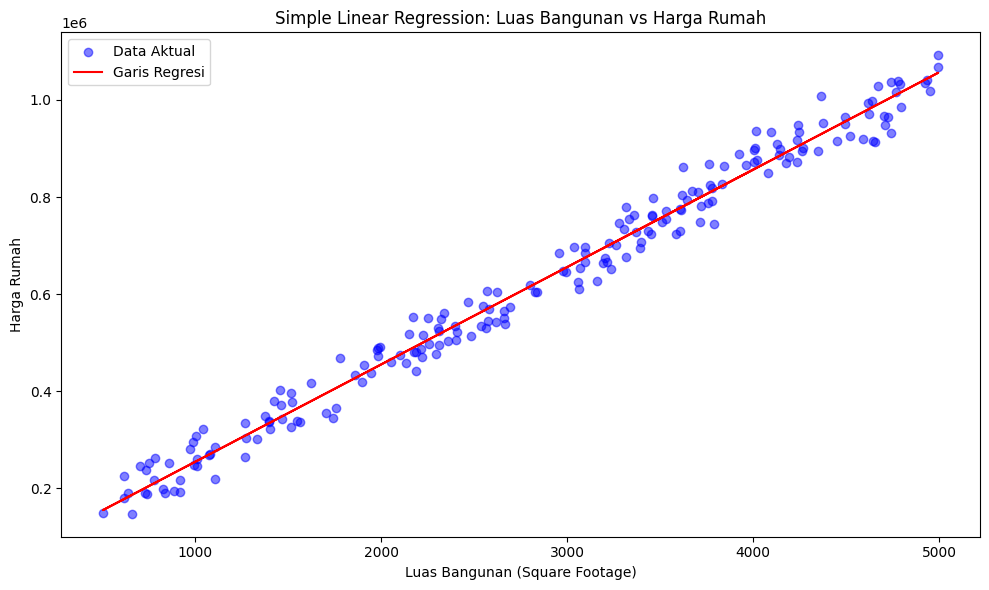

In [9]:
# Visualisasi hasil
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Data Aktual', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Garis Regresi')
plt.xlabel('Luas Bangunan (Square Footage)')
plt.ylabel('Harga Rumah')
plt.title('Simple Linear Regression: Luas Bangunan vs Harga Rumah')
plt.legend()
plt.tight_layout()
plt.show()

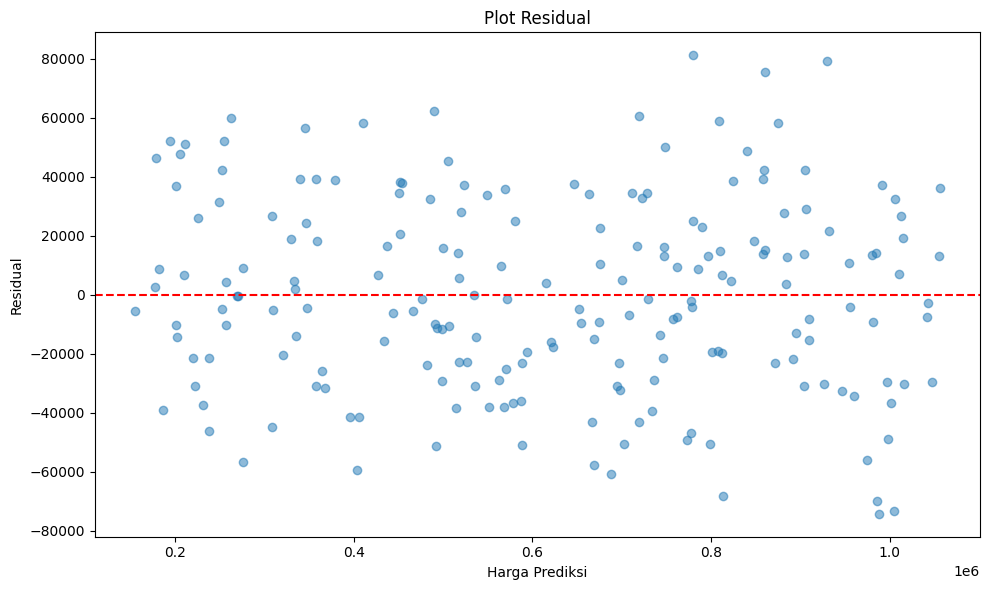

In [10]:
# Visualisasi residual
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Harga Prediksi')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Plot Residual')
plt.tight_layout()
plt.show()

In [11]:
# Fungsi untuk membuat prediksi baru
def predict_house_price(model, square_footage):
    """
    Fungsi untuk memprediksi harga rumah berdasarkan luas bangunan
    """
    prediction = model.predict([[square_footage]])[0]
    return prediction

In [12]:
# Penggunaan fungsi prediksi
contoh_luas = 2000
prediksi_harga = predict_house_price(model, contoh_luas)
print(f"\nContoh Prediksi:")
print(f"Untuk rumah dengan luas {contoh_luas} sq ft:")
print(f"Prediksi harga: ${prediksi_harga:,.2f}")


Contoh Prediksi:
Untuk rumah dengan luas 2000 sq ft:
Prediksi harga: $455,342.81


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
